In [9]:
# pip install numpy pandas matplotlib scikit-learn tensorflow yfinance

In [10]:
import yfinance as yf
import pandas as pd

In [11]:
data = yf.download('AAPL', start = '2010-01-01', end = '2024-06-30')

data = data[['Close']].dropna()

print(data.tail())

/tmp/ipykernel_7368/3933615080.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start = '2010-01-01', end = '2024-06-30')
[*********************100%***********************]  1 of 1 completed

Price            Close
Ticker            AAPL
Date                  
2024-06-24  207.171127
2024-06-25  208.096817
2024-06-26  212.257339
2024-06-27  213.103394
2024-06-28  209.639572


In [12]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np


scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.values)

def create_seq(data, ws):
    X, y = [], []

    for i in range(len(data) - ws):
        X.append(data[i:i+ws])
        y.append(data[i+ws])

    return np.array(X), np.array(y)


In [13]:
window_size = 60
X, y = create_seq(data_scaled, window_size)


split = int(len(X) * 0.8)

X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]


X_train = X_train.reshape((-1, window_size, 1))
X_test = X_test.reshape((-1, window_size, 1))

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, input_shape = (window_size, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()


history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))  

2025-07-02 12:41:00.827262: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0065 - val_loss: 0.0014
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 9.1217e-05 - val_loss: 8.7259e-04
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.4931e-05 - val_loss: 6.5282e-04
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7.7597e-05 - val_loss: 7.3189e-04
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7.5062e-05 - val_loss: 7.8111e-04
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.2710e-05 - val_loss: 6.3239e-04
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.5597e-05 - val_loss: 6.1279e-04
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 6.8995e-05 - val_loss: 5.1896e-04
Epoch 9/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.0695e-05 - val_loss: 4.9422e-04
Epoch 10/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.7506e-05 - val_loss: 4.7498e-04
Epoch 11/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.3950e-05 - val_

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


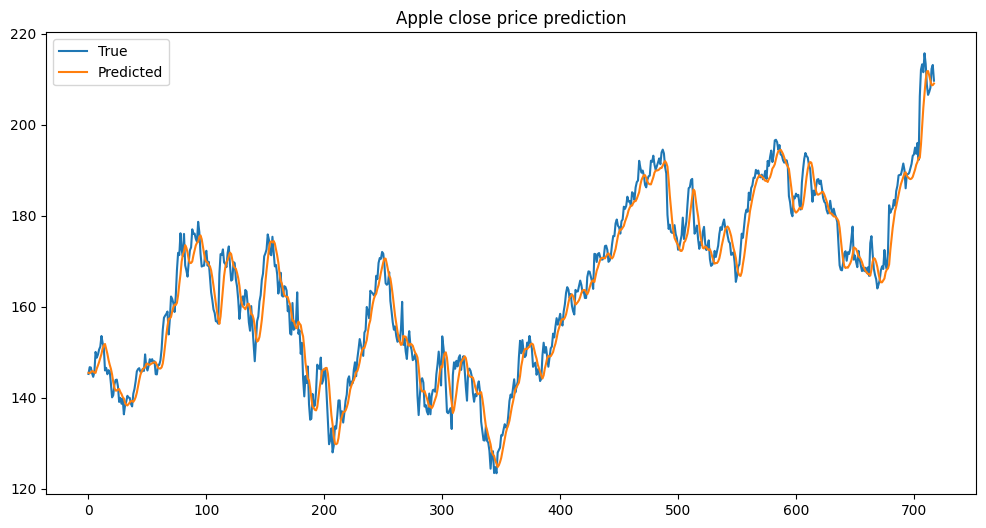

In [19]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_true = scaler.inverse_transform(y_test)


import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_true, label = 'True')
plt.plot(y_pred, label = 'Predicted')

plt.legend()

plt.title('Apple close price prediction')
plt.show()